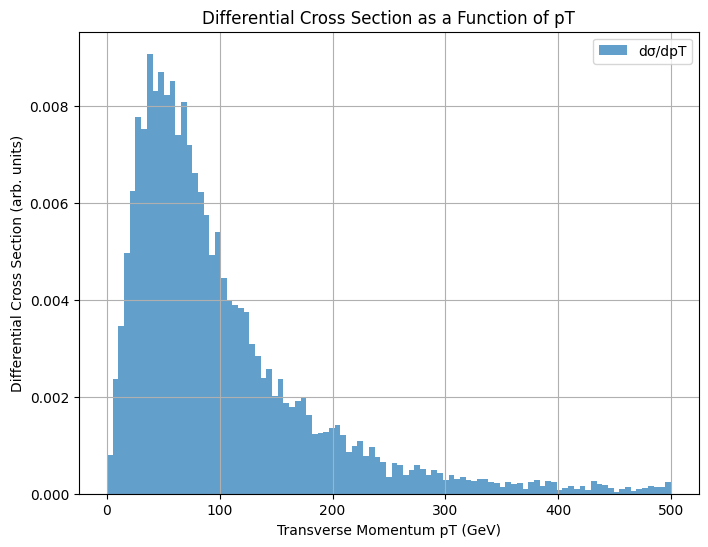

In [13]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt

# iska alternative dhundh 
tree = ET.parse('new.lhe')
root = tree.getroot()


events = root.findall("event")

pt_values = []


for event in events:
    lines = event.text.strip().split("\n")
    num_particles = int(lines[0].split()[0]) 
    
    for i in range(1, num_particles + 1):
        data = lines[i].split()
        pid = int(data[0]) 
        status = int(data[1])  # 1 ka mtlab final state particle
        
        if status == 1:  # Onlyfinalstate particles taaki output ka graph bne
            px = float(data[6])
            py = float(data[7])
            pt = np.sqrt(px**2 + py**2)  # momentum kyunki 
            pt_values.append(pt)


pt_values = np.array(pt_values)


bins = np.linspace(0, max(pt_values), 100)  # 50 bins from 0 to max pT


hist, bin_edges = np.histogram(pt_values, bins=bins, density=True)

# compute bin centers kyunki graph faltu banega
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# histogram ka kachra
plt.figure(figsize=(8, 6))
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.7, label="dσ/dpT")
plt.xlabel("Transverse Momentum pT (GeV)")
plt.ylabel("Differential Cross Section (arb. units)")
plt.title("Differential Cross Section as a Function of pT")
plt.legend()
plt.grid(True)
plt.show()


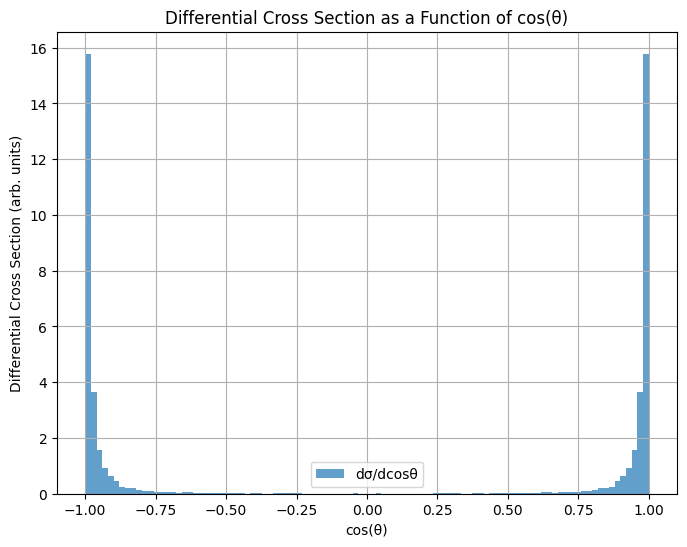

In [14]:

cos_theta_values = []
for event in events:
    lines = event.text.strip().split("\n")
    num_particles = int(lines[0].split()[0])
    
    for i in range(1, num_particles + 1):
        data = lines[i].split()
        status = int(data[1])
        
        if status == 1:
            px = float(data[6])
            py = float(data[7])
            pz = float(data[8])
            p_mag = np.sqrt(px**2 + py**2 + pz**2)
            if p_mag > 0:
                cos_theta = pz / p_mag 
                cos_theta_values.append(cos_theta)

cos_theta_values = np.array(cos_theta_values)

bins_cos = np.linspace(-1.0, 1.0, 100)

hist_cos, bin_edges_cos = np.histogram(cos_theta_values, bins=bins_cos, density=True)
bin_centers_cos = (bin_edges_cos[:-1] + bin_edges_cos[1:]) / 2


plt.figure(figsize=(8, 6))
plt.bar(bin_centers_cos, hist_cos, width=(bin_edges_cos[1] - bin_edges_cos[0]), alpha=0.7, label="dσ/dcosθ")
plt.xlabel("cos(θ)")
plt.ylabel("Differential Cross Section (arb. units)")
plt.title("Differential Cross Section as a Function of cos(θ)")
plt.legend()
plt.grid(True)
plt.show()


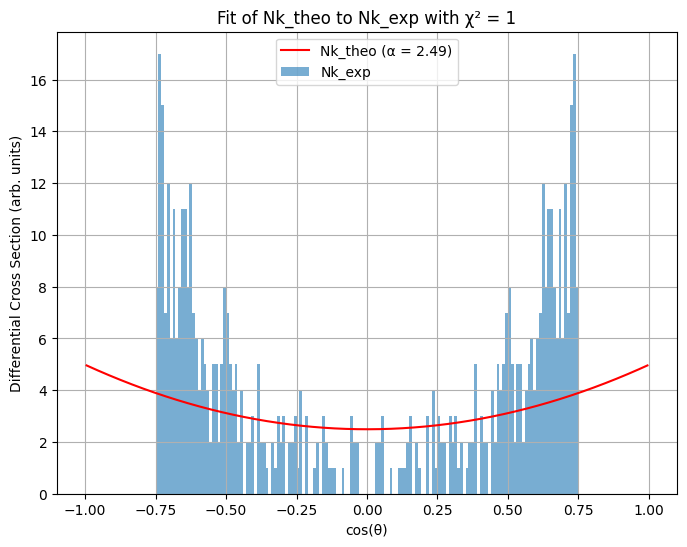

np.float64(2.4907101120500528)

In [ ]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar


tree = ET.parse('new.lhe')
root = tree.getroot()
events = root.findall("event")

cos_theta_values = []

for event in events:
    lines = event.text.strip().split("\n")
    num_particles = int(lines[0].split()[0])

    for i in range(1, num_particles + 1):
        data = lines[i].split()
        status = int(data[1])
        if status == 1:
            px = float(data[6])
            py = float(data[7])
            pz = float(data[8])
            p_mag = np.sqrt(px**2 + py**2 + pz**2)
            if p_mag > 0:
                cos_theta = pz / p_mag
                if abs(cos_theta) >= 0.75:
                    continue


                cos_theta_values.append(cos_theta)

cos_theta_values = np.array(cos_theta_values)

num_bins = 200
bins = np.linspace(-1, 1, num_bins + 1)
Nk_exp, bin_edges = np.histogram(cos_theta_values, bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

def Nk_theo_model(alpha, cos_theta_bins):
    return alpha * (1 + cos_theta_bins**2)


def chi_squared(alpha):
    Nk_theo = Nk_theo_model(alpha, bin_centers)
    mask = Nk_exp > 0  
    chi2 = np.sum(((Nk_exp[mask] - Nk_theo[mask]) / np.sqrt(Nk_exp[mask]))**2)
    return (chi2 - 1)**2 


result = minimize_scalar(chi_squared, bounds=(0, 1000), method='bounded')
best_alpha = result.x

Nk_theo_best = Nk_theo_model(best_alpha, bin_centers)


plt.figure(figsize=(8, 6))
plt.bar(bin_centers, Nk_exp, width=(bin_edges[1]-bin_edges[0]), alpha=0.6, label="Nk_exp")
plt.plot(bin_centers, Nk_theo_best, color='red', label=f"Nk_theo (α = {best_alpha:.2f})")
plt.xlabel("cos(θ)")
plt.ylabel("Differential Cross Section (arb. units)")
plt.title("Fit of Nk_theo to Nk_exp with χ² = 1")
plt.legend()
plt.grid(True)
plt.show()

best_alpha

In [16]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
